In [2]:
import keras
keras.__version__

'2.7.0'

# Kaggle에서 데이터 다운로드 받기
https://www.kaggle.com/c/dogs-vs-cats/data
<br/>Data > train.zip 을 다운로드 받는다.
- Colab에서 샘플 데이터가 사라지지 않게 하려면?<br/>
구글 드라이브에 데이터를 넣고 마운트한다.<br/>
from google.colab import drive<br/>
drive.mount(경로)

In [3]:
import os, shutil

In [18]:
# 원본 데이터셋을 압축 해제한 디렉토리 경로
original_dataset_dir = './data/DogsAndCats/train'
print(original_dataset_dir)
# 소규모 데이터셋을 저장할 디렉토리 경로
base_dir = './data/DogsAndCatsSmall'

./data/DogsAndCats/train


In [4]:
# if로 경로확인
if os.path.exists(base_dir) :
    print('testing...')
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

testing...


In [5]:
# 훈련, 검증, 테스트 분할을 위한 디렉토리 경로
# 3개의 폴더가 만들어진다.0

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [34]:
# 경로 셋팅을 위해 셀을 다시 만듬
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [6]:
# 훈련용 고양이 사진 디렉토리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉토리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [7]:
# 검증용 고양이 사진 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉토리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [8]:
# 테스트 고양이 사진 디렉토리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트 강아지 사진 디렉토리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사한다.
print('Copy files...')
print('---training file (cat)...')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] # 배열로 0번부터 999번까지 지정했다.
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst) # 원본경로의 파일을 cats로 복사한다.
    
# 다음 500개 고양이 이미지를 validation_cats_dir 복사합니다.
print('---validation file (cat)...')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 test_cats_dir로 복사합니다.
print('---test file (cat)...')
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

    

# 처음 1000개의 강아지 이미지를 train_dogs_dir에 복사합니다.
print('---training file (dog)...')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다.
print('---validation file (dog)...')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다.
print('---test file (dog)...')
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


Copy files...
---training file (cat)...
---validation file (cat)...
---test file (cat)...
---training file (dog)...
---validation file (dog)...
---test file (dog)...


In [12]:
print('train 고양이 이미지 전체 개수 :',len(os.listdir(train_cats_dir)))
print('validation 고양이 이미지 전체 개수 :',len(os.listdir(validation_cats_dir)))      
print('test 고양이 이미지 전체 개수 :',len(os.listdir(test_cats_dir)))
print()
print('train 강아지 이미지 전체 개수 :',len(os.listdir(train_dogs_dir)))      
print('validation 강아지 이미지 전체 개수 :',len(os.listdir(validation_dogs_dir)))            
print('test 강아지 이미지 전체 개수 :',len(os.listdir(train_dogs_dir)))

train 고양이 이미지 전체 개수 : 1000
validation 고양이 이미지 전체 개수 : 500
test 고양이 이미지 전체 개수 : 500

train 강아지 이미지 전체 개수 : 1000
validation 강아지 이미지 전체 개수 : 500
test 강아지 이미지 전체 개수 : 1000


In [24]:
import tensorflow as tf
from tensorflow.python.client import device_lib

device_lib.list_local_devices()
tf.test.is_gpu_available()

True

In [10]:
# 1400
from keras import layers
from keras import models

model = models.Sequential() # 순차적인 것을 만들겠다
# 신경망을 총 11개로 쓸 것이다.
# Conv2D -> maxpooling 4번 반복
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [28]:
# 학습 30회, 한 스텝에 거의 1분 50초 정도 걸려서 시간이 꽤 걸린다.

model.fit_generator(train_generator, epochs=30, steps_per_epoch=100, validation_data=validation_generator, validation_steps=50)

C:\Users\Nagyeom\AppData\Local\Temp/ipykernel_25880/2195798361.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=30, steps_per_epoch=100, validation_data=validation_generator, validation_steps=50)


Epoch 1/30
100/100 [==============================] - 7s 53ms/step - loss: 0.6910 - acc: 0.5220 - val_loss: 0.6678 - val_acc: 0.6210
Epoch 2/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6660 - acc: 0.5990 - val_loss: 0.6294 - val_acc: 0.6590
Epoch 3/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6355 - acc: 0.6385 - val_loss: 0.6035 - val_acc: 0.6960
Epoch 4/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5982 - acc: 0.6765 - val_loss: 0.5381 - val_acc: 0.7410
Epoch 5/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5516 - acc: 0.7255 - val_loss: 0.4847 - val_acc: 0.7810
Epoch 6/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5341 - acc: 0.7250 - val_loss: 0.4853 - val_acc: 0.7760
Epoch 7/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5011 - acc: 0.7525 - val_loss: 0.4597 - val_acc: 0.7790
Epoch 8/30
100/100 [==============================] - 5s 51ms/step - 

In [29]:
# 지금까지 학습한 모델을 파일로 저장할 수 있다.
# keras의 모델을 저장하면 확장자가 h5로 저장된다.
model.save('CatsAndDogsSmall1.h5')

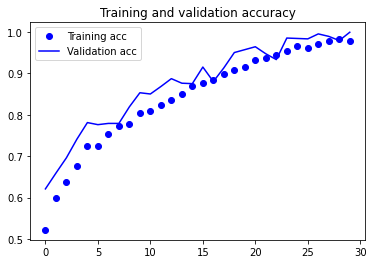

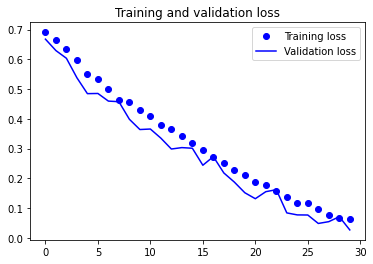

In [30]:
history = model.history
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

과적합이 떴다.. 세상에 똑같이 따라했는데 뭐가 문제일까

의료는 검증된 이미지갯수가 몇개 없을 수 있다. <br/>
그런 경우에는 이미지를 증식해야 한다. <br/>
어떤 식으로 증식할 수 있을까? <br/>
한장을 여러장처럼 쓸 수 있다. -> 랜덤으로 이미지를 좌우 반전을 시키거나 앵글을 30도 틀고 줌인, 줌아웃을 해서 갯수를 늘릴 수 있다. <br/>

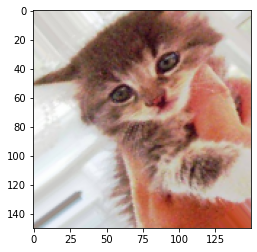

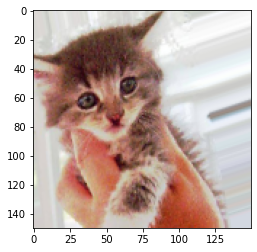

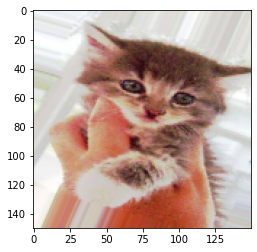

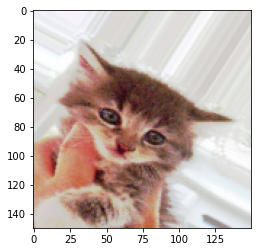

In [35]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\Nagyeom\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

#1000개의 데이터를 100번 학습시키는데, 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


C:\Users\Nagyeom\AppData\Local\Temp/ipykernel_25880/2710494698.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 11s 108ms/step - loss: 0.5352 - acc: 0.7340 - val_loss: 0.5034 - val_acc: 0.7525
Epoch 2/100
100/100 [==============================] - 11s 108ms/step - loss: 0.5380 - acc: 0.7235 - val_loss: 0.5100 - val_acc: 0.7350
Epoch 3/100
100/100 [==============================] - 11s 110ms/step - loss: 0.5226 - acc: 0.7425 - val_loss: 0.5465 - val_acc: 0.7212
Epoch 4/100
100/100 [==============================] - 11s 107ms/step - loss: 0.5193 - acc: 0.7460 - val_loss: 0.5170 - val_acc: 0.7325
Epoch 5/100
100/100 [==============================] - 11s 111ms/step - loss: 0.5232 - acc: 0.7380 - val_loss: 0.5487 - val_acc: 0.7237
Epoch 6/100
100/100 [==============================] - 11s 107ms/step - loss: 0.5090 - acc: 0.7535 - val_loss: 0.5556 - val_acc: 0.7262
Epoch 7/100
100/100 [==============================] - 11s 109ms/step - loss: 0.5178 - acc: 0.7425 - val_loss: 0.4818 - val_acc: 0.7688
Epoch 8/100
100/100 [==============================] - 11s 1

Epoch 61/100
100/100 [==============================] - 11s 112ms/step - loss: 0.3965 - acc: 0.8225 - val_loss: 0.4903 - val_acc: 0.8000
Epoch 62/100
100/100 [==============================] - 11s 108ms/step - loss: 0.4053 - acc: 0.8200 - val_loss: 0.5534 - val_acc: 0.7412
Epoch 63/100
100/100 [==============================] - 11s 110ms/step - loss: 0.4107 - acc: 0.7990 - val_loss: 0.4553 - val_acc: 0.8087
Epoch 64/100
100/100 [==============================] - 11s 109ms/step - loss: 0.4126 - acc: 0.8255 - val_loss: 0.4814 - val_acc: 0.7937
Epoch 65/100
100/100 [==============================] - 11s 112ms/step - loss: 0.4158 - acc: 0.8040 - val_loss: 0.4748 - val_acc: 0.8150
Epoch 66/100
100/100 [==============================] - 11s 109ms/step - loss: 0.4205 - acc: 0.8030 - val_loss: 0.3974 - val_acc: 0.8275
Epoch 67/100
100/100 [==============================] - 11s 111ms/step - loss: 0.3970 - acc: 0.8105 - val_loss: 0.4301 - val_acc: 0.8138
Epoch 68/100
100/100 [===================

신경망에서 구성한 것보다 더 많은 데이터를 넣어서 에러가 나는 것이다.<br/>
batch_size를 32에서 20으로 수정했다.

In [43]:
model.save('CatsAndDogsSmall2.h5')

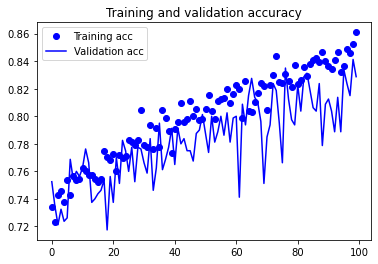

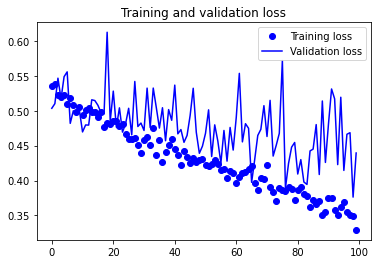

In [44]:
history = model.history
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()